<a href="https://colab.research.google.com/github/dmontjoy/Android_Me/blob/master/Redes_neuronales_para_Analisis_de_Datos_Temporales_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generación de datos

In [0]:
x = np.arange(100)/100
y = x + np.random.normal(scale=0.05, size=100)

## Graficando los datos

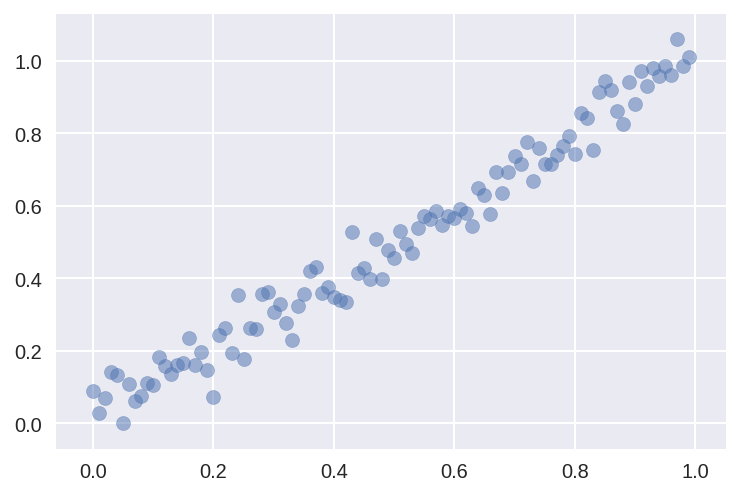

In [0]:
plt.scatter(x, y, alpha=0.5)

## Visualizando los datos

In [0]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [0]:
y

array([0.08820262, 0.03000786, 0.0689369 , 0.14204466, 0.1333779 ,
       0.00113611, 0.10750442, 0.06243214, 0.07483906, 0.11052993,
       0.10720218, 0.18271368, 0.15805189, 0.13608375, 0.16219316,
       0.16668372, 0.23470395, 0.15974209, 0.19565339, 0.14729521,
       0.07235051, 0.24268093, 0.26322181, 0.19289175, 0.35348773,
       0.17728172, 0.26228793, 0.26064081, 0.35663896, 0.36346794,
       0.30774737, 0.32890813, 0.27561071, 0.23096018, 0.32260439,
       0.35781745, 0.42151453, 0.43011899, 0.36063366, 0.37488486,
       0.34757235, 0.3389991 , 0.33468649, 0.52753877, 0.41451739,
       0.42809628, 0.39736023, 0.50887452, 0.39930511, 0.47936299,
       0.45522667, 0.52934512, 0.49445974, 0.47096839, 0.53859089,
       0.57141659, 0.56332586, 0.58512359, 0.5482839 , 0.57186294,
       0.56637698, 0.59202234, 0.57934269, 0.54368587, 0.64887131,
       0.62991095, 0.57849008, 0.69313911, 0.63463508, 0.69259727,
       0.73645453, 0.71644915, 0.77697003, 0.66825871, 0.76011

In [0]:
x.shape,y.shape

((100,), (100,))

## Aplicando regresión lineal

In [0]:
#Agregamos 1's en la primera columna al arreglo de x
X = np.array([np.array([1,a]) for a in x])
X.shape

(100, 2)

In [0]:
#Calculamos la transpuesta
X_transpuesta = X.T
X_transpuesta.shape

(2, 100)

In [0]:
#Hallamos (X.T * X ) ^ -1
factor_1 = np.linalg.inv(np.dot(X_transpuesta,X))
#Hallamos (X.T * y )
factor_2 = np.dot(X_transpuesta,y)

#Obtenemos B mediante factor_1 * factor_2
B = np.dot(factor_1,factor_2)
B

array([0.01042357, 0.98498349])

## Usando sklearn para hacer la regresión lineal

In [0]:
#Redimensionamos x para que sea un arreglo de arreglos en vez de un arreglo y de esa forma poder usarlo con sklearn
x = x[:,None]
x.shape

(100, 1)

In [0]:
x

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

In [0]:
from sklearn.linear_model import LinearRegression

#Invocamos el modelo de regresion linea
m = LinearRegression()
#Entrenamos dicho modelo
m_entrenado = m.fit(x, y)

In [0]:
B_mediante_sklearn = m_entrenado.intercept_,m_entrenado.coef_[0]
B_mediante_sklearn

(0.010423572392110447, 0.9849834916860887)

In [0]:
#Obtenemos el coeficiente de determinacion r^2
m_entrenado.score(x,y)

0.9697611003225353

In [0]:
#Calculamos el coeficiente de determinacion r^2
from sklearn.metrics import r2_score
r2_score(y, m_entrenado.predict(x))

0.9697611003225354

## Graficamos nuestra prediccion

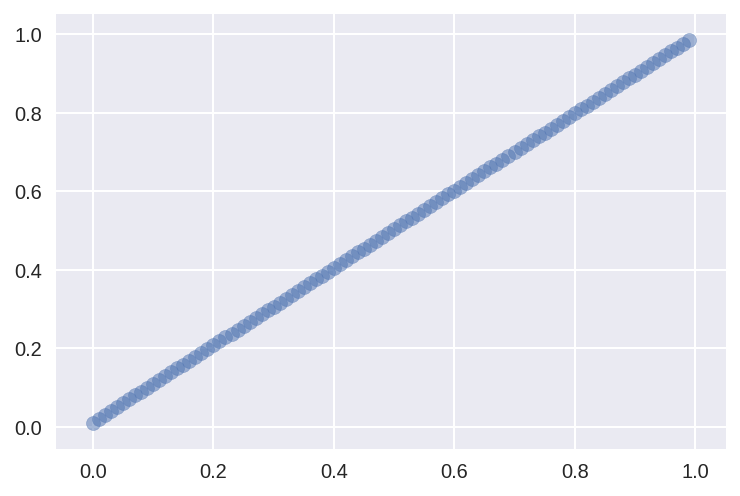

In [0]:
prediccion = m.predict(x)
plt.scatter(x, prediccion, alpha=0.5)

## Usando sklearn para regresión logística

In [0]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [0]:
X = np.array(X[:100])
y = np.array(y[:100])

In [0]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [0]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X, y)

In [0]:
#Viendo el accuracy
clf.score(X, y)

1.0

In [0]:
valores = np.array([np.array([a,b]) for a,b in zip(clf.predict(X),y)])
pd.DataFrame(valores, columns=["Prediccion","Valor Real"])

,Prediccion,Valor Real
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Usamos un perceptrón para clasificación

In [0]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [0]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [0]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [0]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
lista_1 = []
lista_2 = []
for a,b in zip(X,y):
  if b == 0 or b == 1:
    lista_1.append(a)
    lista_2.append(b)
X = np.array(lista_1)
y = np.array(lista_2)

In [0]:
X.shape,y.shape

((360, 64), (360,))

In [0]:
from sklearn.linear_model import Perceptron
clf = Perceptron(n_iter_no_change=10,shuffle=False,n_jobs=-1)
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=1,
      n_jobs=-1, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
#Viendo el accuracy
clf.score(X,y)

1.0

In [0]:
valores = np.array([np.array([a,b]) for a,b in zip(clf.predict(X),y)])
pd.DataFrame(valores, columns=["Prediccion","Valor Real"])

,Prediccion,Valor Real
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


## Ejercicio 1

In [0]:
data = pd.read_csv('https://www.dropbox.com/s/cugxdc9mhau4nw1/titanic2.csv?dl=1')

In [0]:
data

,pclass,male,age,sibsp,parch,fare,cant_flia,frecuencia,embarked_c,embarked_s,embarked_q,survived
0,3,1,22.00,1,0,7.2500,2,243,0,1,0,0
1,3,1,18.00,0,0,8.3000,1,243,0,1,0,0
2,1,0,38.00,1,0,71.2833,2,0,1,0,0,1
3,2,1,28.00,0,1,33.0000,4,0,0,1,0,0
4,2,0,34.00,0,1,23.0000,2,0,0,1,0,1
5,3,1,44.00,0,1,16.1000,2,0,0,1,0,0
6,3,1,26.00,0,0,7.7750,1,0,0,1,0,0
7,3,1,40.00,1,1,15.5000,3,0,0,0,1,0
8,3,0,32.00,1,1,15.5000,3,0,0,0,1,0
9,3,1,22.00,0,0,7.2500,1,0,0,1,0,0


In [0]:
data = data.as_matrix()
data = np.matrix(data)

np.random.seed(123)
m_train    = np.random.rand(len(data)) < 0.5
x = data[m_train,]
x = x[:,:-1]

y = data_train[:,-1]
y = y.A1 #convierte de matriz a vector

## Ejercicio 2

In [0]:
diabetes = datasets.load_diabetes()

# Usando una sola característica
diabetes_X = diabetes.data[:, np.newaxis, 2]

x = diabetes_X
y = diabetes.target